<a href="https://colab.research.google.com/github/pumazzo/corso_AML_2025/blob/main/Lesson_0_HAUFE2014_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.linear_model import LogisticRegression


In the following, non-scalar values are highlighted in **bold**, and we denote random variables by  
upper-case symbols, e.g., `Z`, whereas lower-case analogs, e.g., `z`, represent their respective realizations.  

### Example A  
In Haufe et al. (2014), the two-dimensional classification problem  

$$
X = aZ + H, \quad Y = Z
$$

is introduced, with  

$$
a = (1, 0)^\top, \quad Z \sim \text{Rademacher}(1/2), \quad H \sim \mathcal{N}(0, \Sigma)
$$

with covariance  

$$
\Sigma =
\begin{bmatrix}
s_1^2 & c s_1 s_2 \\
c s_1 s_2 & s_2^2
\end{bmatrix},
$$

where \( s_1 \) and \( s_2 \) are non-negative standard deviations, and \( c \in [-1, 1] \) is a correlation.  

In this example, only feature \( X_1 \) is correlated with the classification target \( Y = Z \) through \( a_1 = 1 \).  
In contrast, \( X_2 \) is independent of \( Y \) since \( a_2 = 0 \). Both features are correlated through  
the superposition of additive noise \( H \) with covariance \( \Sigma \). A depiction of data generated  
under the model is provided in **Figure 1 (a/b) in Appendix A**.  

For \( c \neq 0 \), the Bayes-optimal bivariate linear classification model  

$$
f_{w,b}(x) = w^\top x + b
$$

can reduce the contribution of \( H \) from \( X_1 \) using information contained in \( X_2 \),  
and thereby estimate \( y \) as \( \hat{y} = f_{w,b}(x) \) more precisely


In [2]:
#
dataset = "A"
N=8000
if dataset == "A":

  a = np.array([0,1]).T
  s1,s2,c = 0.9,0.7,0.5
  S = np.zeros((2,2))
  S[0,0] = s1**2;S[0,1]=c*s1*s2;S[1,0]=c*s1*s2;S[1,1] = s2**2
  H = np.random.multivariate_normal(np.zeros(2),S,N)
  Y =np.random.randint(0,2, size=(N))
  Z = Y -1/2
  X = a*np.expand_dims(Z,1) + H
else:

  # example B

  Y = np.random.randn(N)#np.random.randint(0,2, size=(N))
  X = np.random.randn(N,2)
  X[:,0]  = Y - X[:,1]

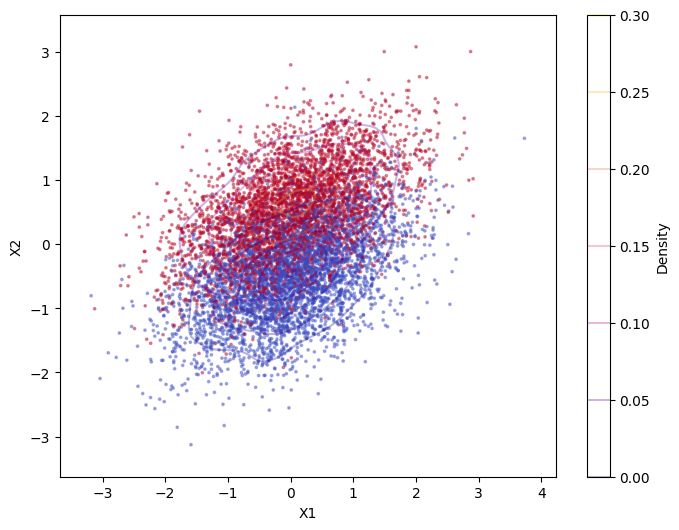

In [3]:


# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, s=3, cmap='coolwarm', alpha=0.4)
plt.xlabel('X1')
plt.ylabel('X2')
if dataset == "A":
  # Create a density plot using KDE
  kde0 = gaussian_kde(X[Y==0].T)  # Compute KDE
  kde1 = gaussian_kde(X[Y==1].T)  # Compute KDE
  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                      np.linspace(y_min, y_max, 100))
  grid_points = np.vstack([xx.ravel(), yy.ravel()])
  density0 = kde0(grid_points).reshape(xx.shape)  # Evaluate KDE on grid
  density1 = kde1(grid_points).reshape(xx.shape)  # Evaluate KDE on grid
    # Add density contours
  plt.contour(xx, yy, density0, levels=5, cmap="plasma",alpha=0.3,vmin = 0, vmax=4)
  plt.contour(xx, yy, density1, levels=5, cmap="plasma",alpha=0.3)



plt.colorbar(label="Density")

plt.show()


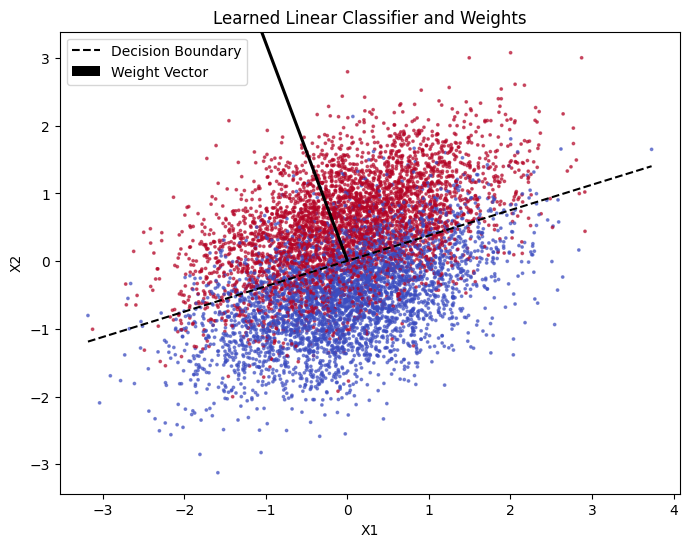

In [4]:

# Train a logistic regression classifier
clf = LogisticRegression()
clf.fit(X, Y)

# Get learned weights
w = clf.coef_[0]  # Extract weight vector
b = clf.intercept_[0]

# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, s=3, cmap='coolwarm', alpha=0.6)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Learned Linear Classifier and Weights')

# Plot decision boundary
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = -(w[0] * x_vals + b) / w[1]  # Solve for y in w1*x + w2*y + b = 0
plt.plot(x_vals, y_vals, 'k--', label="Decision Boundary")

# Plot learned weight vector
origin = np.mean(X, axis=0)  # Center arrow at mean of X
plt.quiver(*origin, *w, scale=0.01, color='black', width=0.005, label="Weight Vector")

plt.legend()
plt.show()


In [5]:
w

array([-1.01877887,  2.71825002])

In [6]:
accuracies = []
Ws = []
Cs = np.linspace(-0.99,0.99,50)
for C in Cs:
  N=20000
  a = np.array([0,1]).T
  s1,s2,c = 0.9,0.7,C
  S = np.zeros((2,2))
  S[0,0] = s1**2;S[0,1]=c*s1*s2;S[1,0]=c*s1*s2;S[1,1] = s2**2
  H = np.random.multivariate_normal(np.zeros(2),S,N)
  Y =np.random.randint(0,2, size=(N))
  Z = Y -1/2
  X = a*np.expand_dims(Z,1) + H

  #train test split
  from sklearn.model_selection import train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
  # Train a logistic regression classifier
  clf = LogisticRegression()
  clf.fit(X_train, Y_train)
  accuracy = clf.score(X_test, Y_test)
  accuracies.append(accuracy)

  # Get learned weights
  w = clf.coef_[0]  # Extract weight vector
  b = clf.intercept_[0]
  Ws.append(w/np.linalg.norm(w))

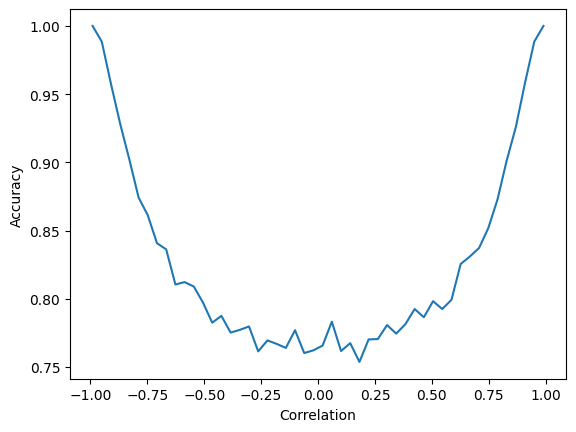

In [7]:
plt.plot(Cs,accuracies)
plt.xlabel("Correlation")
plt.ylabel("Accuracy")
plt.show()

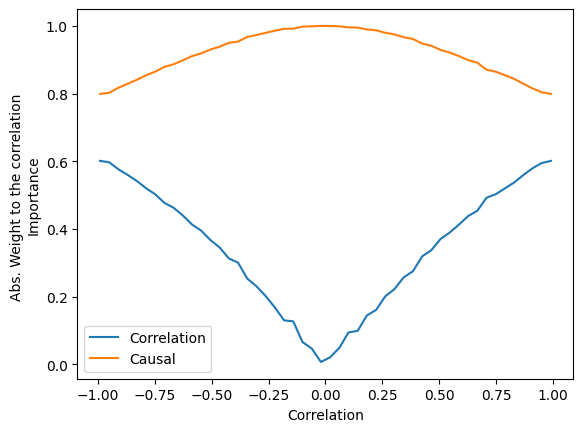

In [8]:
plt.plot(Cs,np.absolute(np.array(Ws)[:,0]),label="Correlation")
plt.plot(Cs,np.absolute(np.array(Ws)[:,1]),label="Causal")
plt.xlabel("Correlation")
plt.ylabel(f"Abs. Weight to the correlation \nImportance")
plt.legend()
plt.show()

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim


In [27]:
class LogisticRegression(nn.Module):
  def __init__(self, input_size):
    super(LogisticRegression, self).__init__()
    self.input_size=input_size
    self.w= nn.Parameter(torch.randn(input_size,1))
    self.b= nn.Parameter( torch.zeros(1))
    self.optimizer = optim.Adam(self.parameters(), lr=0.001)
    self.loss_func= nn.BCELoss()

  def forward(self, x):
    return torch.sigmoid(torch.matmul(x, self.w) + self.b)

  def fit(self, data, target):
    self.optimizer = optim.Adam(self.parameters(), lr=0.03)
    for epoch in range(800):
      self.optimizer.zero_grad()
      output=self.forward(data)
      #print(output.shape)
      #break
      loss = self.loss_func(output, target)
      loss.backward()
      self.optimizer.step()
      if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")
  def score(self, data, target):
    out = self.forward(data)
    predicted_class = (out > 0.5).float()
    accuracy = (predicted_class == target).float().mean()
    print(f"Accuracy: {accuracy.item()}")

    return accuracy.item()



In [28]:
clf = LogisticRegression(2)

In [29]:
data = torch.randn(100,2)
target = torch.randint(0,2,(100,1)).float()
clf.fit(data, target)
out = clf.forward(data)
score = clf.score(data, target)

Epoch 0, Loss: 0.9357272982597351
Epoch 100, Loss: 0.6849857568740845
Epoch 200, Loss: 0.684977650642395
Epoch 300, Loss: 0.6849777102470398
Epoch 400, Loss: 0.684977650642395
Epoch 500, Loss: 0.684977650642395
Epoch 600, Loss: 0.684977650642395
Epoch 700, Loss: 0.684977650642395
Accuracy: 0.550000011920929


In [30]:
predicted_class = (out > 0.5).float()
accuracy = (predicted_class == target).float().mean()
print(f"Accuracy: {accuracy.item()}")

Accuracy: 0.550000011920929


In [31]:
X_train.shape

torch.Size([16000, 2])

In [42]:
accuracies = []
Ws = []
Cs = np.linspace(-0.99,0.99,50)
for C in Cs:
  N=20000
  a = np.array([0,1]).T
  s1,s2,c = 0.9,0.7,C
  S = np.zeros((2,2))
  S[0,0] = s1**2;S[0,1]=c*s1*s2;S[1,0]=c*s1*s2;S[1,1] = s2**2
  H = np.random.multivariate_normal(np.zeros(2),S,N)
  Y =np.random.randint(0,2, size=(N))
  Z = Y -1/2
  X = a*np.expand_dims(Z,1) + H

  #train test split
  from sklearn.model_selection import train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
  X_train = torch.tensor(X_train, dtype=torch.float32)
  X_test = torch.tensor(X_test, dtype=torch.float32)
  Y_train = torch.tensor(Y_train, dtype=torch.float32).reshape(-1,1)
  Y_test = torch.tensor(Y_test, dtype=torch.float32).reshape(-1,1)
  # Train a logistic regression classifier
  clf = LogisticRegression(2)
  clf.fit(X_train, Y_train)
  accuracy = clf.score(X_test, Y_test)
  accuracies.append(accuracy)
  #break

  # Get learned weights
  w = clf.w.data.numpy()[:,0]  # Extract weight vector
  b = clf.b.data.numpy()
  Ws.append(w/np.linalg.norm(w))

Epoch 0, Loss: 0.538395345211029
Epoch 100, Loss: 0.1829500049352646
Epoch 200, Loss: 0.09177665412425995
Epoch 300, Loss: 0.0568670891225338
Epoch 400, Loss: 0.0394991971552372
Epoch 500, Loss: 0.029427696019411087
Epoch 600, Loss: 0.022980503737926483
Epoch 700, Loss: 0.018559858202934265
Accuracy: 1.0
Epoch 0, Loss: 0.8759624361991882
Epoch 100, Loss: 0.34977221488952637
Epoch 200, Loss: 0.205998495221138
Epoch 300, Loss: 0.14590910077095032
Epoch 400, Loss: 0.11422710120677948
Epoch 500, Loss: 0.09491680562496185
Epoch 600, Loss: 0.08199577033519745
Epoch 700, Loss: 0.0727766826748848
Accuracy: 0.9892500042915344
Epoch 0, Loss: 0.48371806740760803
Epoch 100, Loss: 0.23729893565177917
Epoch 200, Loss: 0.17931242287158966
Epoch 300, Loss: 0.15364804863929749
Epoch 400, Loss: 0.1399226188659668
Epoch 500, Loss: 0.1317097246646881
Epoch 600, Loss: 0.12643860280513763
Epoch 700, Loss: 0.1228957399725914
Accuracy: 0.9629999995231628
Epoch 0, Loss: 1.0348851680755615
Epoch 100, Loss: 0.41

In [43]:
clf.b.data.numpy()

array([0.01543509], dtype=float32)

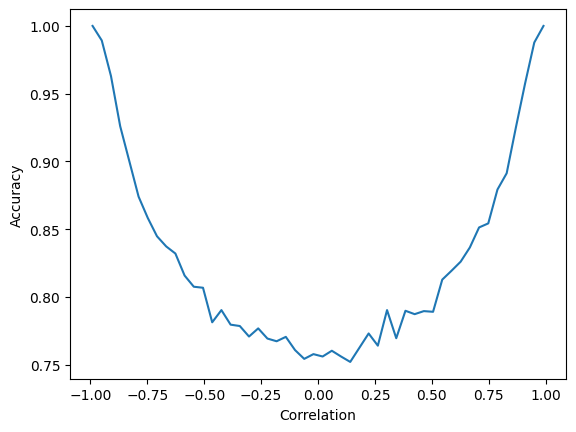

In [44]:
plt.plot(Cs,accuracies)
plt.xlabel("Correlation")
plt.ylabel("Accuracy")
plt.show()

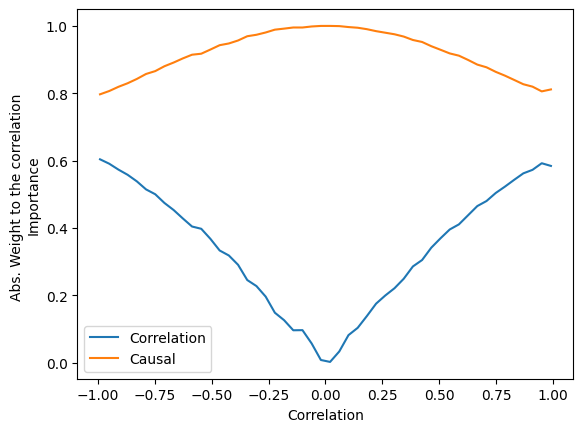

In [45]:
plt.plot(Cs,np.absolute(np.array(Ws)[:,0]),label="Correlation")
plt.plot(Cs,np.absolute(np.array(Ws)[:,1]),label="Causal")
plt.xlabel("Correlation")
plt.ylabel(f"Abs. Weight to the correlation \nImportance")
plt.legend()
plt.show()

In [54]:
class MLP(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(MLP, self).__init__()

    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, hidden_size)
    self.linear3 = nn.Linear(hidden_size, output_size)
    self.optimizer = optim.Adam(self.parameters(), lr=0.001)
    self.loss_func= nn.BCELoss()

  def forward(self, x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    out = self.relu(out)
    out = self.linear3(out)
    out = torch.sigmoid(out)
    return out

  def fit(self, data, target, max_epoch =1000):
      self.optimizer = optim.Adam(self.parameters(), lr=0.03)
      for epoch in range(max_epoch):
        self.optimizer.zero_grad()
        output=self.forward(data)
        #print(output.shape)
        #break
        loss = self.loss_func(output, target)
        loss.backward()
        self.optimizer.step()
        if epoch % 100 == 0:
          print(f"Epoch {epoch}, Loss: {loss.item()}")

  def score(self, data, target):
    out = self.forward(data)
    predicted_class = (out > 0.5).float()
    accuracy = (predicted_class == target).float().mean()
    print(f"Accuracy: {accuracy.item()}")

    return accuracy.item()



In [56]:
mlp = MLP(2,64,1)

data = torch.randn(200,2)
target = torch.randint(0,2,(200,1)).float()
mlp.fit(data, target,max_epoch = 2000)
out = mlp.forward(data)
score = mlp.score(data, target)

Epoch 0, Loss: 0.6930844187736511
Epoch 100, Loss: 0.4556392729282379
Epoch 200, Loss: 0.35641443729400635
Epoch 300, Loss: 0.31904134154319763
Epoch 400, Loss: 0.25432515144348145
Epoch 500, Loss: 0.2149410843849182
Epoch 600, Loss: 0.20077413320541382
Epoch 700, Loss: 0.18138442933559418
Epoch 800, Loss: 0.15741275250911713
Epoch 900, Loss: 0.14994651079177856
Epoch 1000, Loss: 0.12673567235469818
Epoch 1100, Loss: 0.22550846636295319
Epoch 1200, Loss: 0.1278161108493805
Epoch 1300, Loss: 0.12266189604997635
Epoch 1400, Loss: 0.11543508619070053
Epoch 1500, Loss: 0.11719530820846558
Epoch 1600, Loss: 0.11688658595085144
Epoch 1700, Loss: 0.09961459040641785
Epoch 1800, Loss: 0.10287091135978699
Epoch 1900, Loss: 0.22471843659877777
Accuracy: 0.9200000166893005
